<a href="https://colab.research.google.com/github/kunalk3/DeepLearning_RPS_game/blob/main/rps_game.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
!wget https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip

--2020-12-07 10:43:50--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.142.128, 74.125.195.128, 74.125.20.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.142.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 200682221 (191M) [application/zip]
Saving to: ‘rps.zip.1’

rps.zip.1           100%[===================>] 191.38M  78.5MB/s    in 2.4s    

2020-12-07 10:43:53 (78.5 MB/s) - ‘rps.zip.1’ saved [200682221/200682221]

--2020-12-07 10:43:53--  https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.197.128, 74.125.20.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.197.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 29516758 (28M) [application/zip]
Saving to: ‘rps-test-se

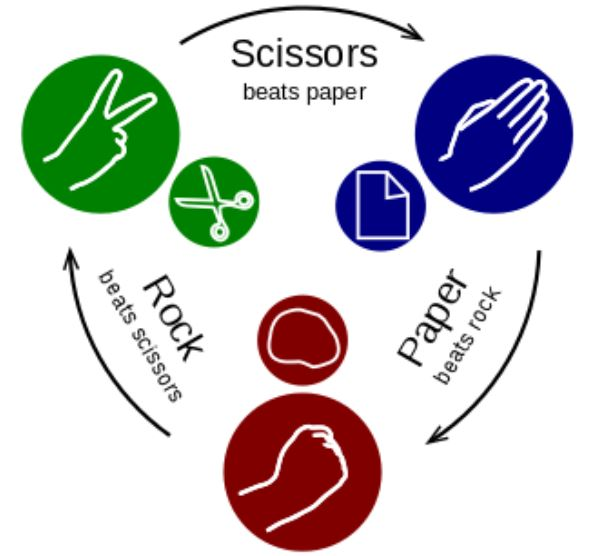

In [ ]:
!unzip rps.zip
!unzip rps-test-set.zip

Archive:  rps.zip
replace rps/paper/paper01-000.png? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: rps/paper/paper01-000.png  
  inflating: rps/paper/paper01-001.png  
  inflating: rps/paper/paper01-002.png  
  inflating: rps/paper/paper01-003.png  
  inflating: rps/paper/paper01-004.png  
  inflating: rps/paper/paper01-005.png  
  inflating: rps/paper/paper01-006.png  
  inflating: rps/paper/paper01-007.png  
  inflating: rps/paper/paper01-008.png  
  inflating: rps/paper/paper01-009.png  
  inflating: rps/paper/paper01-010.png  
  inflating: rps/paper/paper01-011.png  
  inflating: rps/paper/paper01-012.png  
  inflating: rps/paper/paper01-013.png  
  inflating: rps/paper/paper01-014.png  
  inflating: rps/paper/paper01-015.png  
  inflating: rps/paper/paper01-016.png  
  inflating: rps/paper/paper01-017.png  
  inflating: rps/paper/paper01-018.png  
  inflating: rps/paper/paper01-019.png  
  inflating: rps/paper/paper01-020.png  
  inflating: rps/paper/paper01-021.png  
  inf

In [ ]:
ls

rps/  rps-test-set/  rps-test-set.zip  rps.zip  sample_data/


In [ ]:
rock_dir = './rps/rock'
paper_dir = './rps/paper'
scissors_dir = './rps/scissors'

In [ ]:
import os
print('Total images (Rock)    :', len(os.listdir(rock_dir)))
print('Total images (Paper)   :', len(os.listdir(paper_dir)))
print('Total images (Scissors):', len(os.listdir(scissors_dir)))

Total images (Rock)    : 840
Total images (Paper)   : 840
Total images (Scissors): 840


In [ ]:
rock_images = os.listdir(rock_dir)
paper_images = os.listdir(paper_dir)
scissors_images = os.listdir(scissors_dir)

In [ ]:
rock_images[:5]

['rock04-102.png',
 'rock02-051.png',
 'rock02-045.png',
 'rock06ck02-111.png',
 'rock03-063.png']

In [ ]:
from PIL import Image

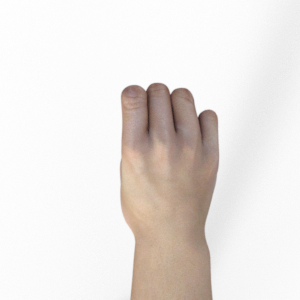

In [ ]:
Image.open(rock_dir + '/rock06ck02-111.png')

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

In [ ]:
train_dir = "./rps"
test_dir = "./rps-test-set"
dataGen = ImageDataGenerator(1/255.0)

In [ ]:
train_data = dataGen.flow_from_directory(train_dir, target_size = (150, 150), class_mode = 'categorical')
test_data = dataGen.flow_from_directory(test_dir, target_size = (150, 150), class_mode = 'categorical')

Found 2520 images belonging to 3 classes.
Found 372 images belonging to 3 classes.


In [ ]:
train_data.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(64, (3,3), activation='relu', input_shape= (150,150,3)))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Conv2D(100, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))

# output layer
model.add(Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
H = model.fit(train_data, epochs=20, validation_data=test_data)

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:720: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


Epoch 1/20
79/79 [==============================] - 10s 126ms/step - loss: 9.7680 - accuracy: 0.6698 - val_loss: 0.7688 - val_accuracy: 0.6559
Epoch 2/20
79/79 [==============================] - 10s 123ms/step - loss: 0.1530 - accuracy: 0.9452 - val_loss: 0.7734 - val_accuracy: 0.8441
Epoch 3/20
79/79 [==============================] - 10s 123ms/step - loss: 0.0657 - accuracy: 0.9825 - val_loss: 0.7458 - val_accuracy: 0.8548
Epoch 4/20
79/79 [==============================] - 9s 119ms/step - loss: 0.0353 - accuracy: 0.9905 - val_loss: 0.7473 - val_accuracy: 0.8548
Epoch 5/20
79/79 [==============================] - 9s 118ms/step - loss: 0.0204 - accuracy: 0.9933 - val_loss: 0.7140 - val_accuracy: 0.9032
Epoch 6/20
79/79 [==============================] - 9s 118ms/step - loss: 0.0136 - accuracy: 0.9964 - val_loss: 0.7303 - val_accuracy: 0.8656
Epoch 7/20
79/79 [==============================] - 9s 118ms/step - loss: 0.0163 - accuracy: 0.9940 - val_loss: 0.9140 - val_accuracy: 0.9059
Epo

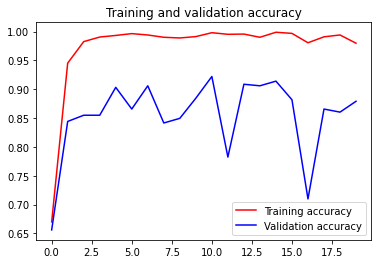

<Figure size 432x288 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt
acc = H.history['accuracy']
val_acc = H.history['val_accuracy']
loss = H.history['loss']
val_loss = H.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  #images = np.vstack([x])
  classes = model.predict(x, batch_size=10)
  classInfo = model.predict_classes(x)
  print('----------- Prediction -----------')
  print('Image name   : ', fn)
  print('Probability  : ', classes)
  print('Class type   : ', classInfo)

  if classInfo == 0:
    print('Prediction is ----> Paper')
  elif classInfo == 1:
    print('Prediction is ----> Rock')
  else:
    print('Prediction is ----> Sessiors')

Saving testrock01-23.png to testrock01-23 (3).png
Saving testpaper04-20.png to testpaper04-20 (3).png
Saving scissors01-015.png to scissors01-015 (4).png
----------- Prediction -----------
Image name   :  testrock01-23.png
Probability  :  [[1.0664144e-12 1.0000000e+00 2.8317128e-38]]
Class type   :  [1]
Prediction is ----> Rock
----------- Prediction -----------
Image name   :  testpaper04-20.png
Probability  :  [[1.0000000e+00 1.8683247e-22 4.3533402e-15]]
Class type   :  [0]
Prediction is ----> Paper
----------- Prediction -----------
Image name   :  scissors01-015.png
Probability  :  [[3.9974340e-11 5.7802396e-13 1.0000000e+00]]
Class type   :  [2]
Prediction is ----> Sessiors


In [ ]:
train_data.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

In [ ]:
model.save("rps.h5")